In [25]:
import pandas as pd
import os
print("Current working directory:", os.getcwd())

downloads_path = os.path.expanduser('~/Downloads')
file_path = os.path.join(downloads_path, 'customer_transaction_details.csv')
print("Looking for file at:", file_path)

Current working directory: /Users/aviralh
Looking for file at: /Users/aviralh/Downloads/customer_transaction_details.csv


In [26]:
#feature engineering , this creates a csv on a transaction level, so need to combine data for a customer
import pandas as pd

# Load the dataset
transactions = pd.read_csv('~/Downloads/customer_transaction_details.csv')

# 1. Total transaction amount per customer
transactions['total_amount'] = transactions.groupby('customerEmail')['transactionAmount'].transform('sum')

# 2. Columns for counts of each order state per customer
transactions['count_pending'] = transactions[transactions['orderState'] == 'pending'].groupby('customerEmail')['orderState'].transform('count')
transactions['count_failed'] = transactions[transactions['orderState'] == 'failed'].groupby('customerEmail')['orderState'].transform('count')
transactions['count_fulfilled'] = transactions[transactions['orderState'] == 'fulfilled'].groupby('customerEmail')['orderState'].transform('count')

# 3. Count unique payment method providers per customer
transactions['unique_mpro_pc'] = transactions.groupby('customerEmail')['paymentMethodProvider'].transform('nunique')

# 4. Count unique payment method types per customer
transactions['unique_mtype_pc'] = transactions.groupby('customerEmail')['paymentMethodType'].transform('nunique')

# 5. Columns for each unique payment method type
payment_type_counts = pd.get_dummies(transactions['paymentMethodType'], prefix='count')
payment_type_counts = payment_type_counts.groupby(transactions['customerEmail']).transform('sum')
transactions = pd.concat([transactions, payment_type_counts], axis=1)


# 6. Columns for each unique payment method provider
provider_counts = pd.get_dummies(transactions['paymentMethodProvider'], prefix='count')
provider_counts = provider_counts.groupby(transactions['customerEmail']).transform('sum')
transactions = pd.concat([transactions, provider_counts], axis=1)

# 7. Failed total amount
transactions['failed_total_amount'] = transactions[transactions['transactionFailed'] == 1].groupby('customerEmail')['transactionAmount'].transform('sum')

# 8. Success total amount
transactions['success_total_amount'] = transactions[transactions['transactionFailed'] == 0].groupby('customerEmail')['transactionAmount'].transform('sum')

# 9. Pending sum amount
transactions['pending_sum_amount'] = transactions[transactions['orderState'] == 'pending'].groupby('customerEmail')['transactionAmount'].transform('sum')

# 10. Failed sum amount
transactions['failed_sum_amount'] = transactions[transactions['orderState'] == 'failed'].groupby('customerEmail')['transactionAmount'].transform('sum')

# 11. Fulfilled sum amount
transactions['fulfilled_sum_amount'] = transactions[transactions['orderState'] == 'fulfilled'].groupby('customerEmail')['transactionAmount'].transform('sum')

# Fill NaNs with zeros for all new columns where necessary
transactions.fillna(0, inplace=True)

# Optionally, drop duplicates to leave one row per customer
transactions.drop_duplicates('customerEmail', keep='last', inplace=True)

# Save to CSV
transactions.to_csv('~/Downloads/processed_customer_transactions.csv', index=False)

In [ ]:
#features created for all categorical variables and those columns will be dropped

In [27]:
#creating a customer level dataset,combining all rows for a customer into one

import pandas as pd

# Load the dataset
transactions_final = pd.read_csv('~/Downloads/processed_customer_transactions.csv')

customer_level_data = transactions_final.groupby('customerEmail').max().reset_index()

customer_level_data.to_csv('~/Downloads/transactions_final.csv', index=False)

print(customer_level_data.isnull().sum())




customerEmail                        0
Unnamed: 0                           0
transactionId                        0
orderId                              0
paymentMethodId                      0
paymentMethodRegistrationFailure     0
paymentMethodType                    0
paymentMethodProvider                0
transactionAmount                    0
transactionFailed                    0
orderState                           0
total_amount                         0
count_pending                        0
count_failed                         0
count_fulfilled                      0
unique_mpro_pc                       0
unique_mtype_pc                      0
count_apple pay                      0
count_bitcoin                        0
count_card                           0
count_paypal                         0
count_American Express               0
count_Diners Club / Carte Blanche    0
count_Discover                       0
count_JCB 15 digit                   0
count_JCB 16 digit       

In [28]:
#fraud column convert to int

import pandas as pd

# Load the dataset
customer_df_final = pd.read_csv('~/Downloads/ecommerce_fraud_detection_dataset/customers_df.csv')

customer_df_final['Fraud'] = customer_df_final['Fraud'].apply(lambda x: 1 if x else 0)

customer_df_final.to_csv('./customer_df_final.csv', index=False)


Unnamed: 0                0
customerEmail             0
customerPhone             0
customerDevice            0
customerIPAddress         0
customerBillingAddress    0
No_Transactions           0
No_Orders                 0
No_Payments               0
Fraud                     0
dtype: int64


In [32]:
#dropped extra rows which were not present in the dataset, a total of 25 emails had no data in the Transaction Details dataset
import pandas as pd

customer_df_final = pd.read_csv('~/Downloads/customer_df_final.csv')
transactions_final = pd.read_csv('~/Downloads/transactions_final.csv')

merged_df = pd.merge(transactions_final, customer_df_final, on='customerEmail', how='left')

print(merged_df.isnull().sum())
#dropping these columns as new features cover these
merged_df=merged_df.drop(['customerEmail','transactionId','orderId','paymentMethodId','paymentMethodType','paymentMethodProvider','orderState','customerPhone','customerDevice','customerIPAddress','customerBillingAddress'],axis=1)

merged_df.to_csv('~/Downloads/merged_df.csv', index=False)#143 rows



customerEmail                        0
Unnamed: 0                           0
transactionId                        0
orderId                              0
paymentMethodId                      0
paymentMethodRegistrationFailure     0
paymentMethodType                    0
paymentMethodProvider                0
transactionAmount                    0
transactionFailed                    0
orderState                           0
total_amount                         0
count_pending                        0
count_failed                         0
count_fulfilled                      0
unique_mpro_pc                       0
unique_mtype_pc                      0
count_apple pay                      0
count_bitcoin                        0
count_card                           0
count_paypal                         0
count_American Express               0
count_Diners Club / Carte Blanche    0
count_Discover                       0
count_JCB 15 digit                   0
count_JCB 16 digit       

No_Orders


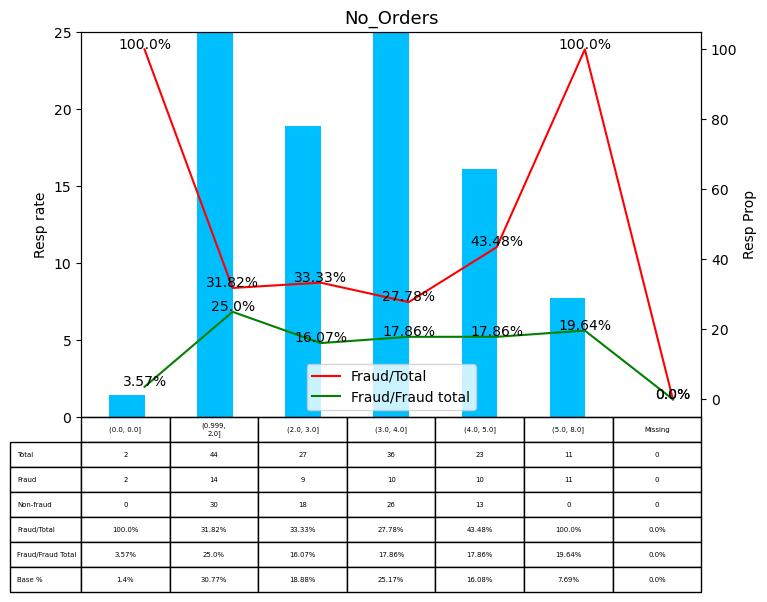

No_Payments


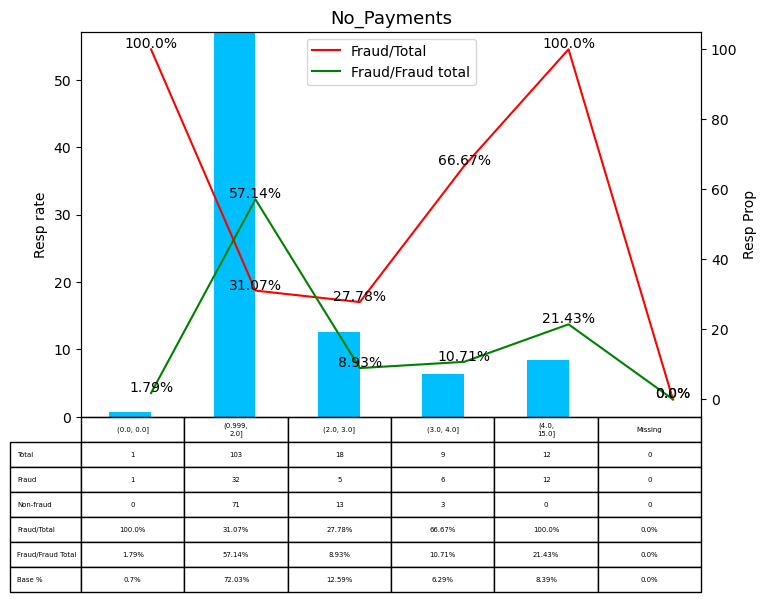

No_Transactions


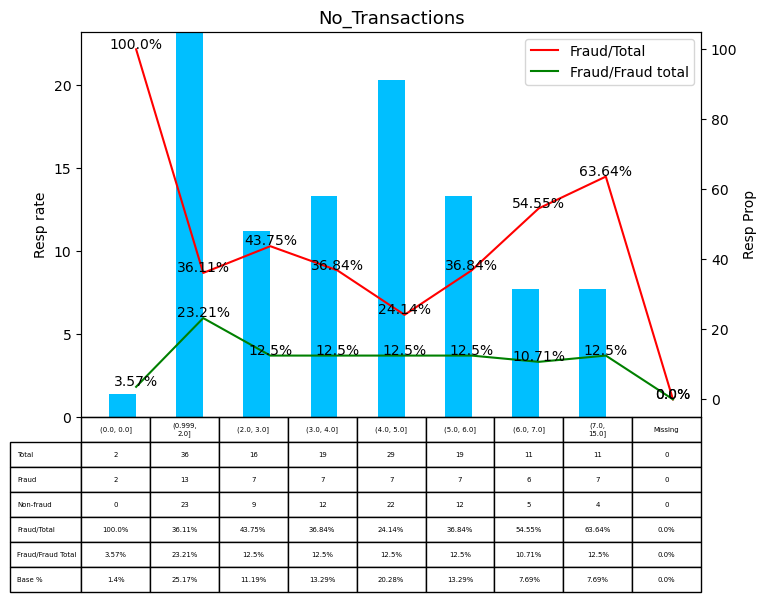

Unnamed: 0


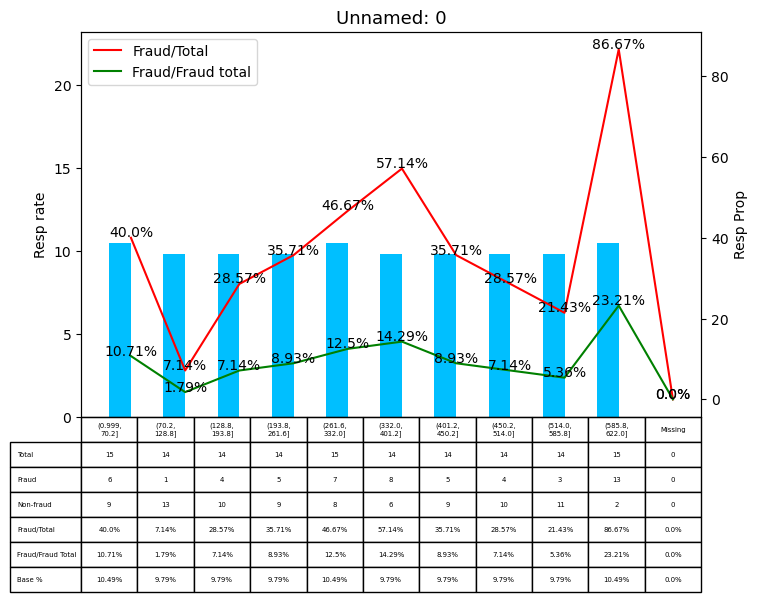

count_American Express


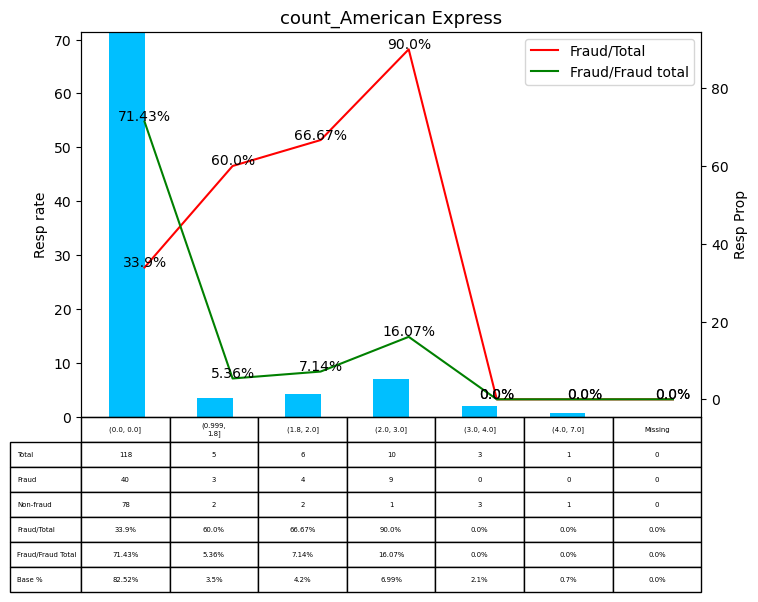

count_Diners Club / Carte Blanche


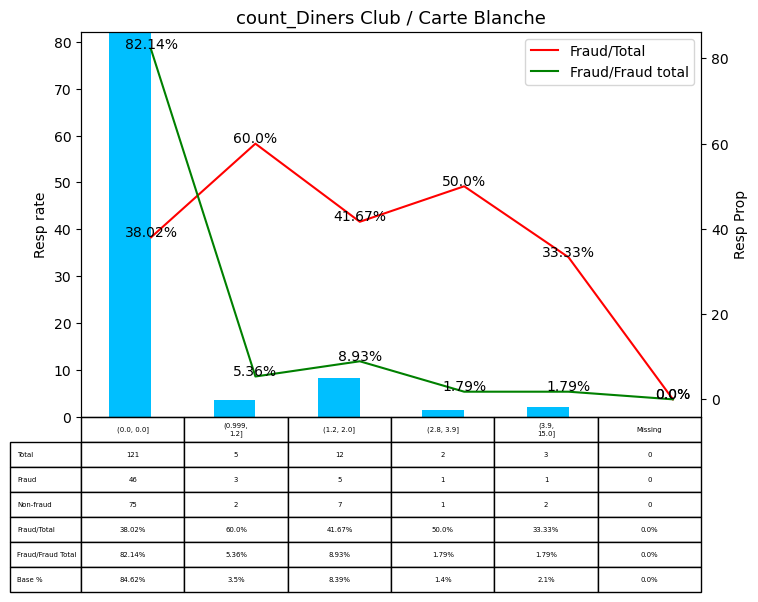

count_Discover


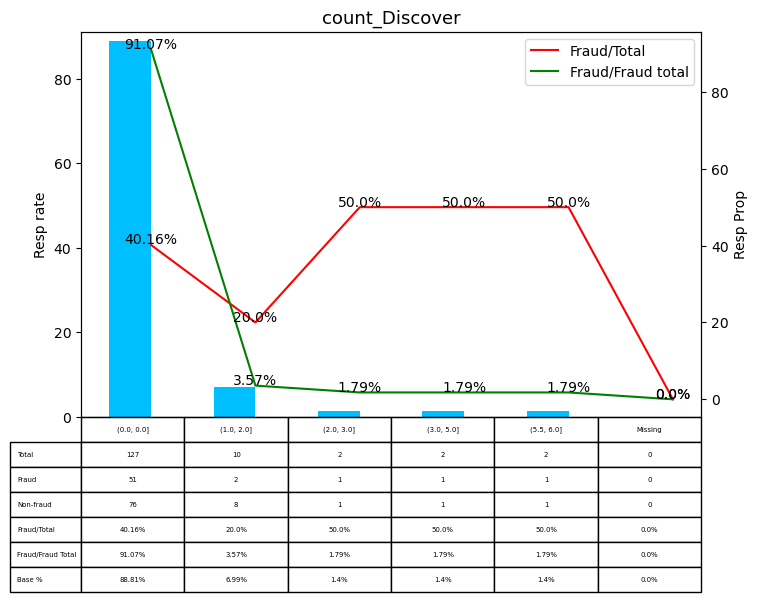

count_JCB 15 digit


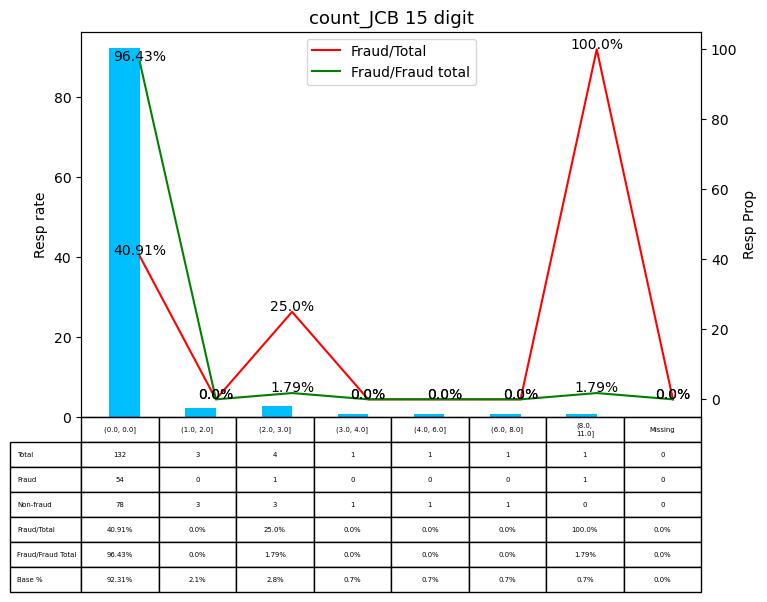

count_JCB 16 digit


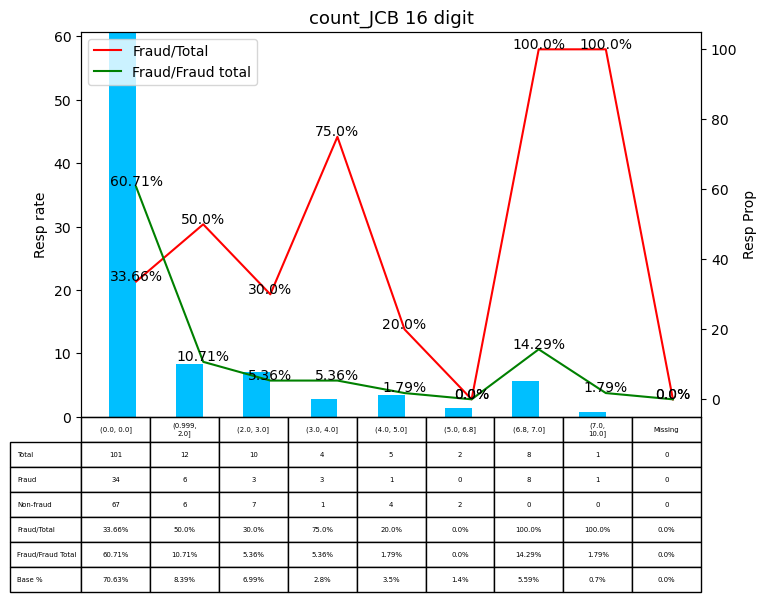

count_Maestro


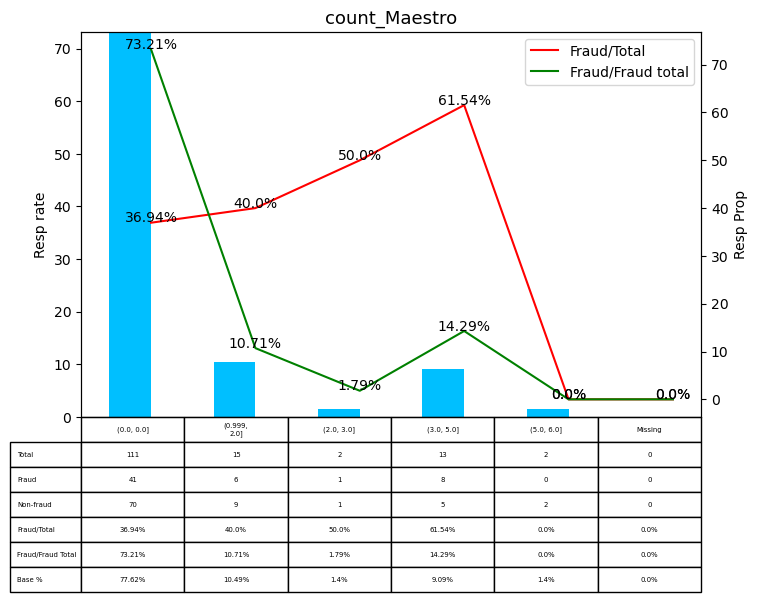

count_Mastercard


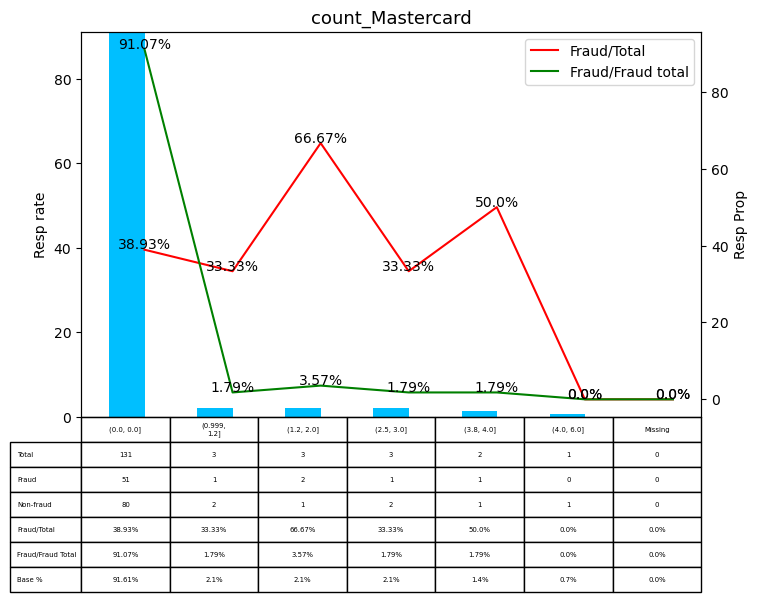

count_VISA 13 digit


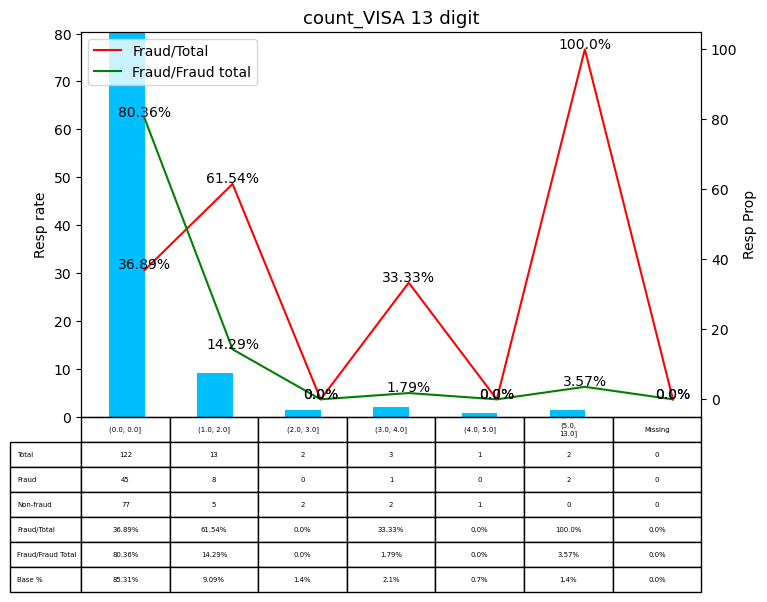

count_VISA 16 digit


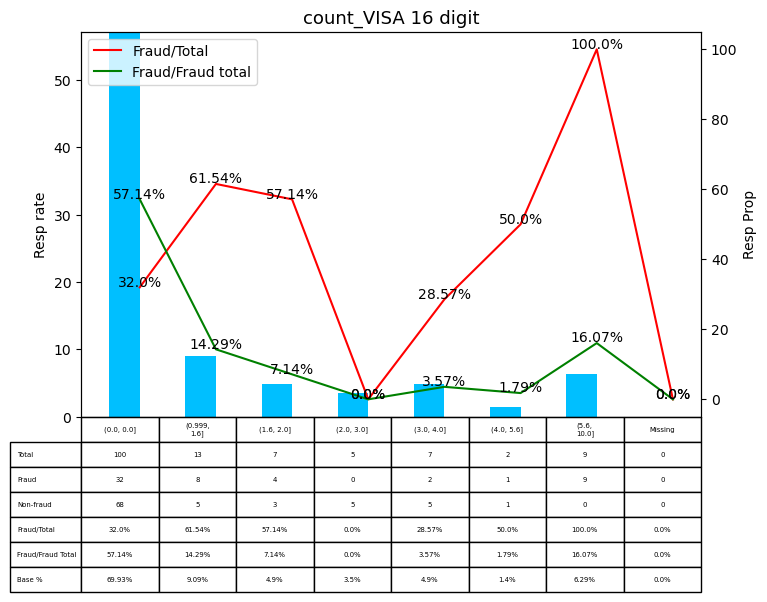

count_Voyager


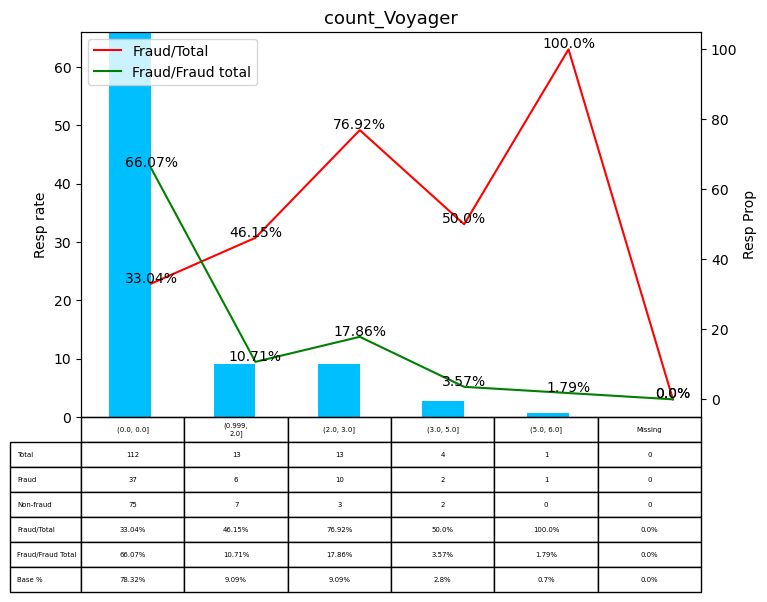

count_apple pay


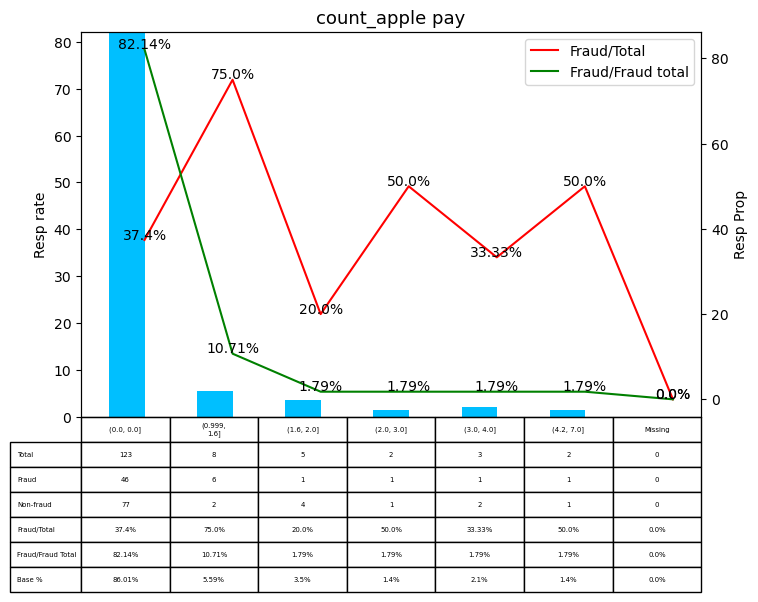

count_bitcoin


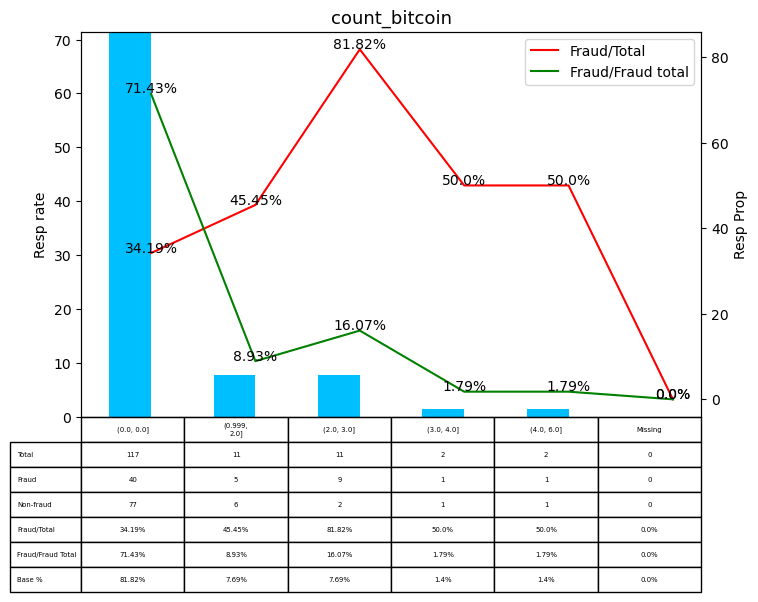

count_card


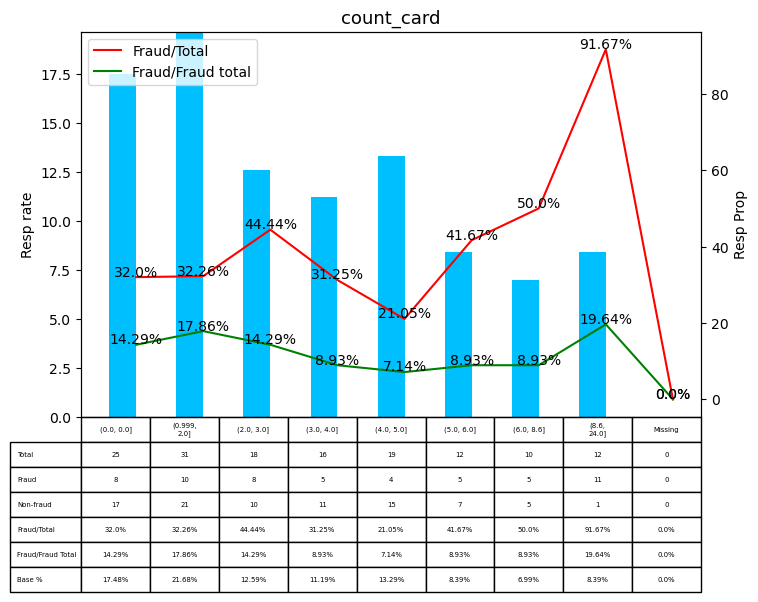

count_failed


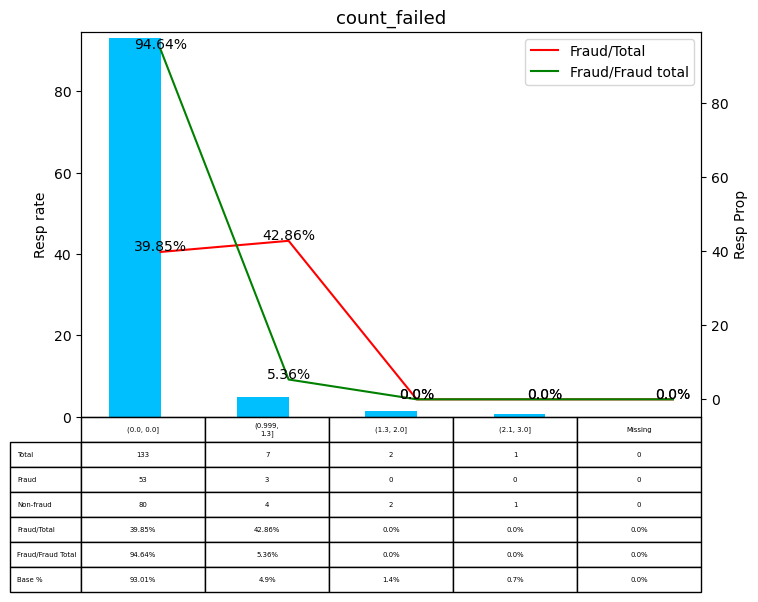

count_fulfilled


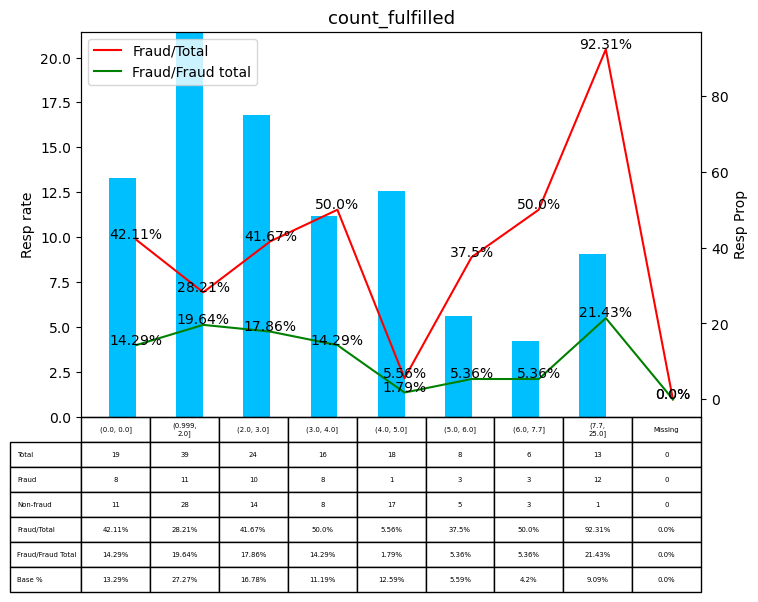

count_paypal


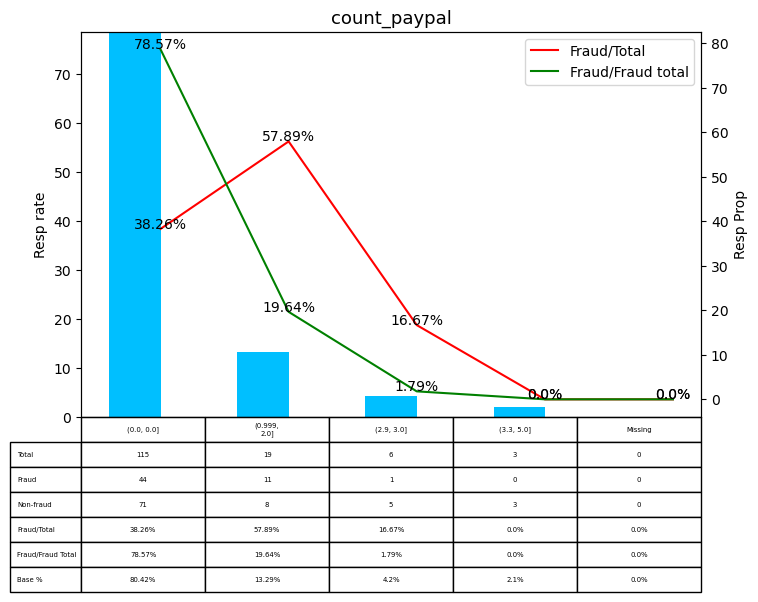

count_pending


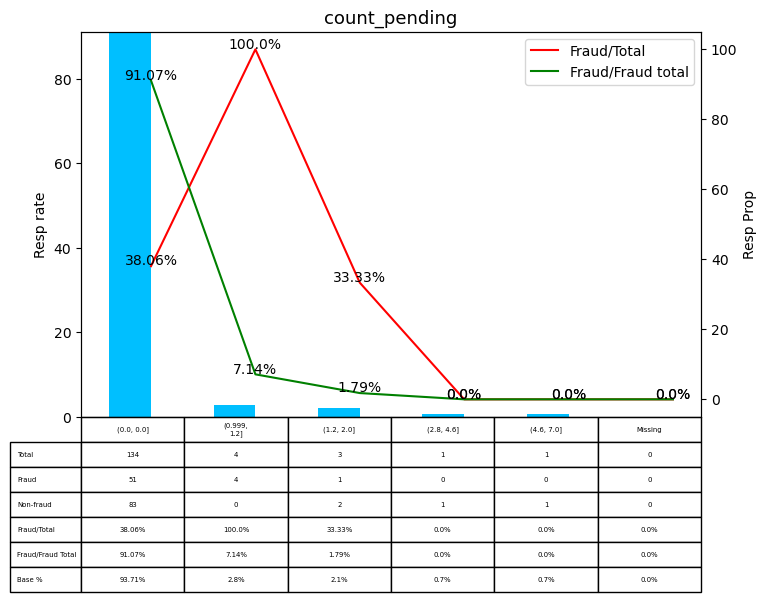

failed_sum_amount


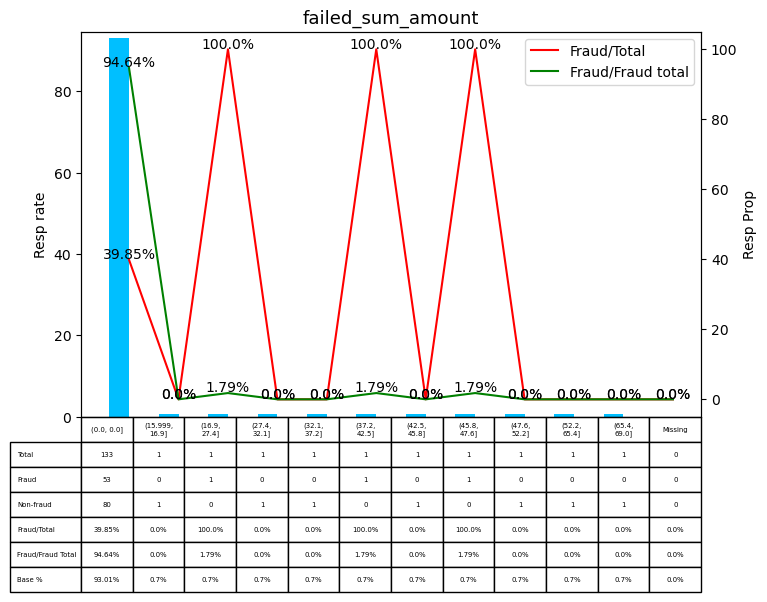

failed_total_amount


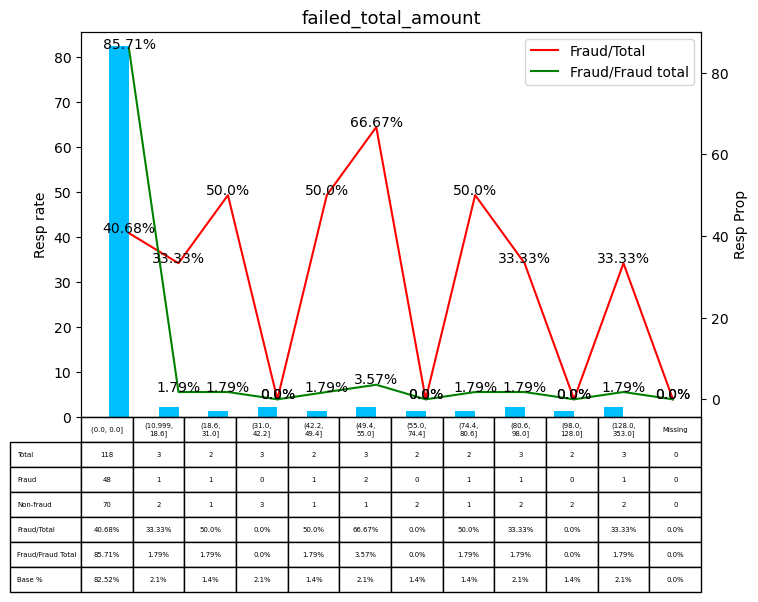

fulfilled_sum_amount


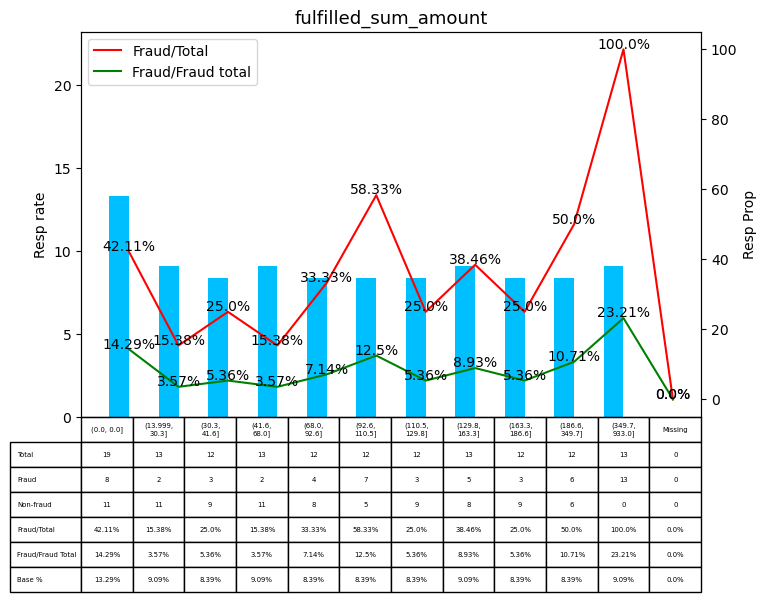

paymentMethodRegistrationFailure


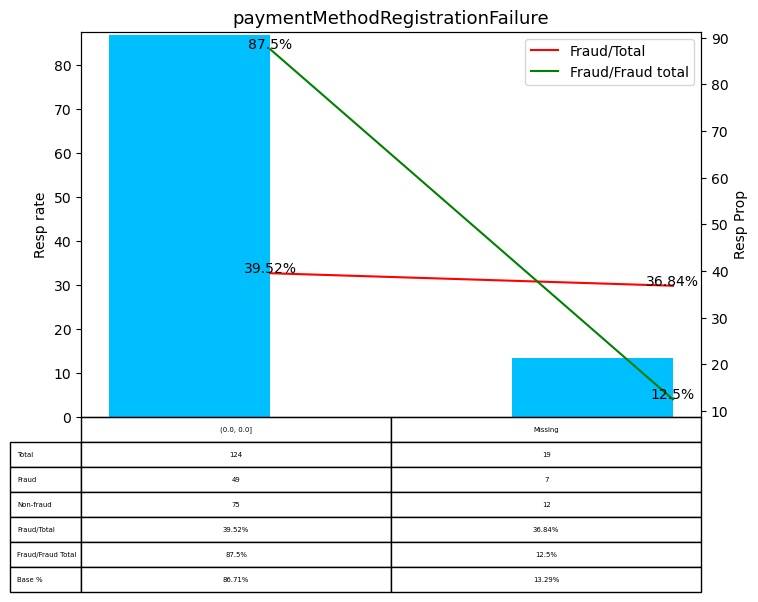

pending_sum_amount


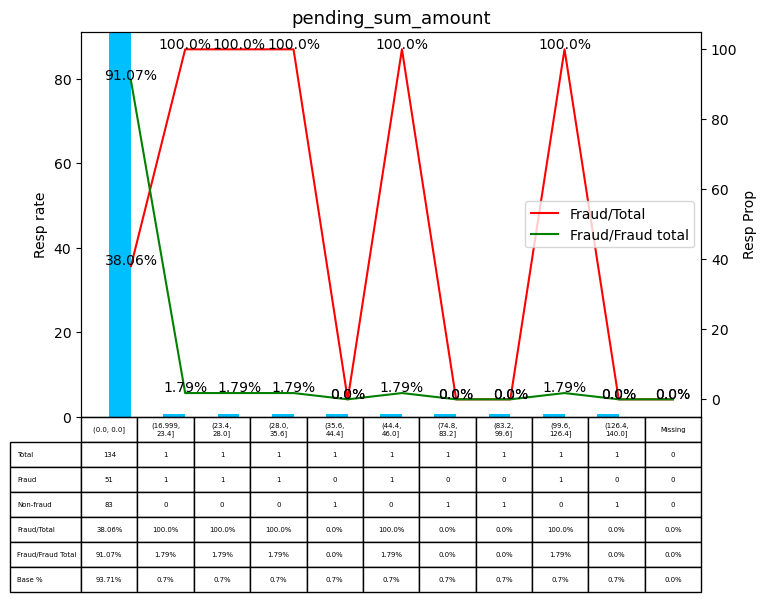

success_total_amount


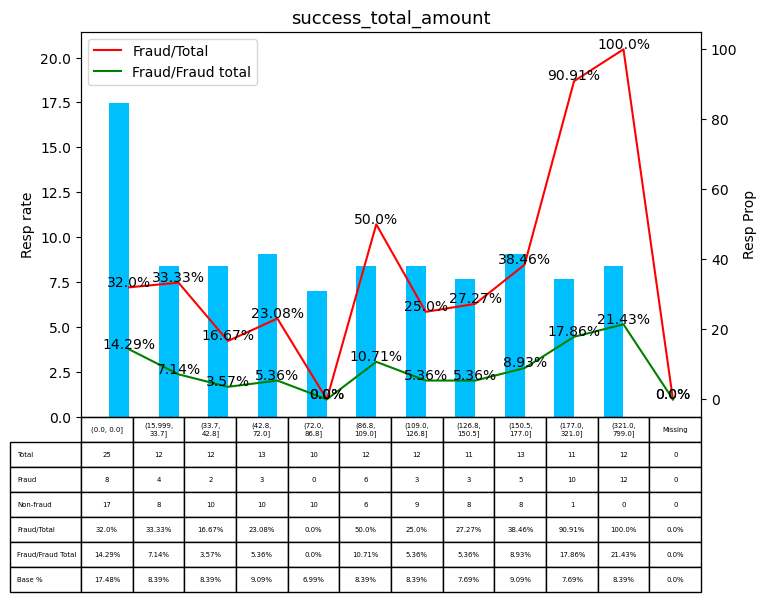

total_amount


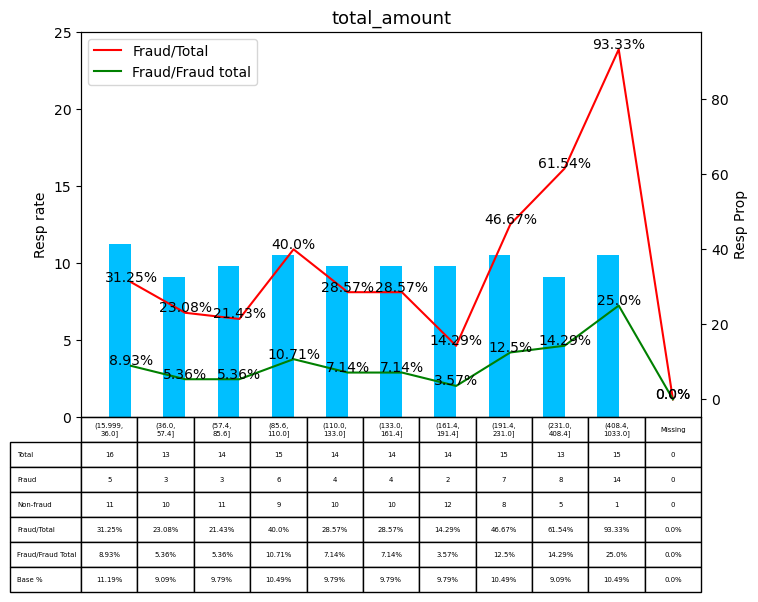

transactionAmount


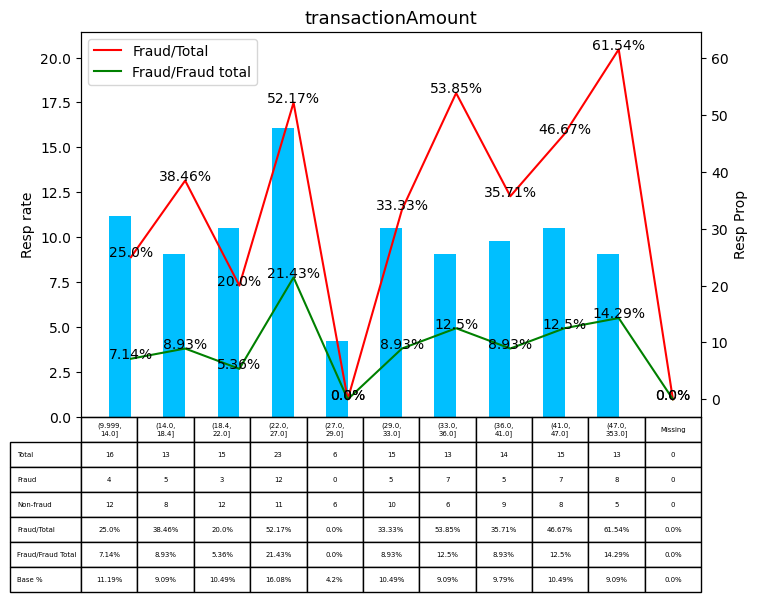

transactionFailed


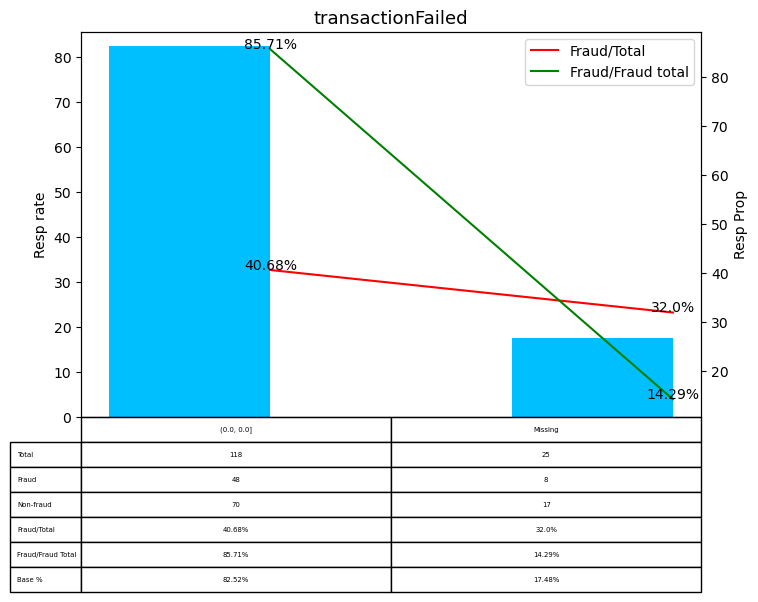

unique_mpro_pc


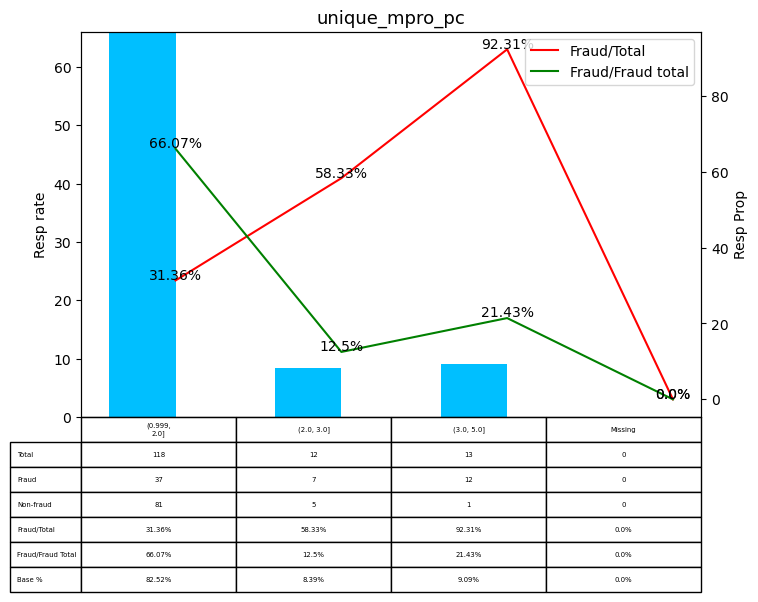

unique_mtype_pc


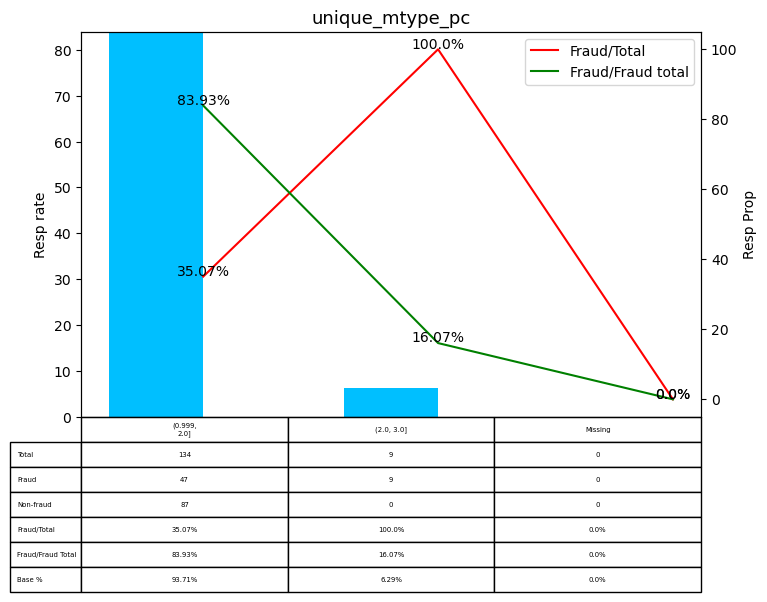

In [33]:
#EDA of each column with the target column, Each column is divided into quantiles . EDA did not produce great results, most columns shows zigzag pattern.
#5-6 columns have a strictly increasing or decreasing trend but using those columns for model training is not suitable as many features get ignored.
#Model testing for these columns was done and it yielded worse results than LR. In conclusion EDA was not so useful on this dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap


file_path = '~/Downloads/merged_df.csv'

df = pd.read_csv(file_path)


def EDA(df, var, target_col):
    print(var)
    
    var_data = df[[var, target_col]].copy()

    if var_data[var].dtypes == object:
        var_data[var] = var_data[var].astype(int)
       
    var_data.sort_values(var, inplace=True)

    if var_data[var].sum() != 0:
        var_data['range_of_var'] = pd.qcut(var_data[var][var_data[var] != 0], 10, duplicates='drop')
        var_data['range_of_var'] = var_data['range_of_var'].apply(lambda x: pd.Interval(left=round(x.left, 3), right=round(x.right, 3)))
        var_data['range_of_var'] = np.where(var_data[var] == 0, pd.Interval(0.0, 0.0), var_data['range_of_var'])
        var_data['range_of_var'] = var_data['range_of_var'].astype('category')
        var_data['range_of_var'] = var_data['range_of_var'].cat.add_categories('Missing').fillna('Missing')
    else:
        var_data['range_of_var'] = pd.Interval(0.0, 0.0)

    var_data['range_of_var'] = var_data['range_of_var'].astype('category')

    summ = pd.pivot_table(var_data, values=var, index='range_of_var', columns=target_col, aggfunc='count')
    summ['Total'] = summ.sum(axis=1)
    summ['resp_prop'] = summ[1] * 100 / summ[1].sum()
    summ['resp_rate'] = summ[1] * 100 / summ['Total']
    summ['base_%'] = summ['Total'] * 100 / summ['Total'].sum()

    summ.fillna(0, inplace=True)

    summ['base_%'] = round(summ['base_%'], 2)
    summ['resp_rate'] = round(summ['resp_rate'], 2)
    summ['resp_prop'] = round(summ['resp_prop'], 2)

    summ['Fraud/Total'] = summ['resp_rate'].apply(lambda x: str(x)) + '%'
    summ['Fraud/Fraud Total'] = summ['resp_prop'].apply(lambda x: str(x)) + '%'
    summ['Base %'] = summ['base_%'].apply(lambda x: str(x)) + '%'

    summ_final = summ.reset_index()

    summary = summ_final.copy()
    labels = summary['range_of_var']
    fig, ax1 = plt.subplots(figsize=(8, 5))
    width = 0.40

    x = np.arange(len(labels))

    max_y_lim = max(summ['resp_prop'])

    ax1.bar(x - width / 2, summary['base_%'], color='deepskyblue', width=0.4)
    ax1.set_ylabel('Resp rate', color='Black')
    ax1.set_ylim(0, max_y_lim)

    ax2 = ax1.twinx()
    ax2.plot(summary['range_of_var'].astype('str'), summary['resp_rate'], 'red')
    ax2.set_ylabel('Resp Prop', color='Black')

    for i, v in enumerate(summary['resp_rate']):
        plt.text(i, v - 0.5, str(v) + "%", ha='center', va='bottom')

    ax2.plot(summary['range_of_var'].astype('str'), summary['resp_prop'], color='green')

    for i, v in enumerate(summary['resp_prop']):
        plt.text(i, v - 0.5, str(v) + "%", ha='center', va='bottom')

    data = [summary['Total'], summary[1], summary[0], summary['Fraud/Total'], summary['Fraud/Fraud Total'], summary['Base %']]
    rows = ['Total', 'Fraud', 'Non-fraud', 'Fraud/Total', 'Fraud/Fraud Total', 'Base %']
    cols = summary['range_of_var']

    max_chars_per_line = 10
    wrapped_cols = [textwrap.fill(str(col), max_chars_per_line) for col in cols]

    cell_text = []
    for row in range(len(rows)):
        cell_text.append(data[row])

    table = plt.table(cellText=cell_text, rowLabels=rows, colLabels=wrapped_cols, loc='bottom', cellLoc='center')

    cell_height = 0.065
    for key, cell in table.get_celld().items():
        cell.set_height(cell_height)

    table.auto_set_font_size(False)
    table.set_fontsize(5)

    plt.title(label=var, fontsize=13, color="Black")
    plt.legend(["Fraud/Total", "Fraud/Fraud total"])
    plt.xticks([])
    plt.show()

# List of columns to perform EDA on
columns_to_analyze = df.columns.difference(['customerEmail', 'Fraud'])


for col in columns_to_analyze:
    EDA(df, col, 'Fraud')


In [ ]:
Observations

1. No_Orders
Observation: The number of orders (No_Orders) shows a pattern where higher counts of orders are associated with higher fraud rates.
Decision: Keep this column as it provides significant information for predicting fraud.
2. No_Payments
Observation: The number of payments (No_Payments) exhibits a clear pattern where more payments correlate with higher fraud probability.
Decision: Keep this column for its predictive value.
3. No_Transactions
Observation: The number of transactions (No_Transactions) indicates that a higher number of transactions is linked with an increased fraud rate.
Decision: Keep this column as it helps in identifying potential fraud.
4. count_American Express
Observation: The count of American Express transactions does not show a clear distinction between fraud and non-fraud cases.
Decision: Drop this column as it does not contribute significant information for predicting fraud.
5. count_Diners Club / Carte Blanche
Observation: The count of Diners Club / Carte Blanche transactions also does not reveal a clear pattern distinguishing fraud from non-fraud cases.
Decision: Drop this column as it does not provide meaningful insights.
6. count_Discover
Observation: The count of Discover transactions does not show a significant distinction between fraud and non-fraud cases.
Decision: Drop this column due to its lack of predictive value.
7. count_JCB 15 digit
Observation: The count of JCB 15 digit transactions does not exhibit a clear pattern between fraud and non-fraud cases.
Decision: Drop this column as it does not provide useful information.
8. count_JCB 16 digit
Observation: The count of JCB 16 digit transactions does not show a distinct pattern between fraud and non-fraud cases.
Decision: Drop this column as it is not informative.
9. count_Maestro
Observation: The count of Maestro transactions does not display a clear distinction between fraud and non-fraud cases.
Decision: Drop this column due to its lack of relevance.
10. count_Mastercard
Observation: The count of Mastercard transactions does not reveal a significant pattern distinguishing fraud from non-fraud cases.
Decision: Drop this column as it does not contribute valuable insights.
11. count_VISA 13 digit
Observation: The count of VISA 13 digit transactions does not show a clear pattern between fraud and non-fraud cases.
Decision: Drop this column due to its lack of predictive value.
12. count_VISA 16 digit
Observation: The count of VISA 16 digit transactions does not exhibit a clear distinction between fraud and non-fraud cases.
Decision: Drop this column as it is not informative.
13. count_Voyager
Observation: The count of Voyager transactions does not show a significant pattern distinguishing fraud from non-fraud cases.
Decision: Drop this column as it does not contribute valuable insights.
14. failed_total_amount
Observation: The total amount of failed transactions (failed_total_amount) shows a pattern where higher failed amounts are associated with higher fraud rates.
Decision: Keep this column as it provides significant information for predicting fraud.
15. success_total_amount
Observation: The total amount of successful transactions (success_total_amount) exhibits a pattern where higher amounts correlate with lower fraud rates.
Decision: Keep this column for its predictive value.
16. pending_sum_amount
Observation: The total amount of pending transactions (pending_sum_amount) indicates that higher pending amounts are linked with increased fraud rates.
Decision: Keep this column as it helps in identifying potential fraud.
17. failed_sum_amount
Observation: The total amount of failed transactions (failed_sum_amount) shows a pattern where higher failed amounts are associated with higher fraud rates.
Decision: Keep this column as it provides significant information for predicting fraud.
18. fulfilled_sum_amount
Observation: The total amount of fulfilled transactions (fulfilled_sum_amount) exhibits a pattern where higher amounts correlate with lower fraud rates.
Decision: Keep this column for its predictive value.
19. transactionAmount
Observation: The transaction amount (transactionAmount) reveals that larger transaction amounts have a higher proportion of fraud cases.
Decision: Keep this column, as it is useful for identifying potential fraud.
20. transactionFailed
Observation: The number of failed transactions (transactionFailed) shows a pattern where more failed transactions are associated with higher fraud rates.
Decision: Keep this column as it provides significant information for predicting fraud.
21. count_pending
Observation: The count of pending transactions (count_pending) exhibits a clear pattern where more pending transactions correlate with higher fraud probability.
Decision: Keep this column for its predictive value.
22. count_failed
Observation: The count of failed transactions (count_failed) indicates that a higher number of failed transactions is linked with an increased fraud rate.
Decision: Keep this column as it helps in identifying potential fraud.
23. count_fulfilled
Observation: The count of fulfilled transactions (count_fulfilled) shows a pattern where higher counts of fulfilled transactions are associated with lower fraud rates.
Decision: Keep this column as it provides significant information for predicting fraud.
24. unique_mpro_pc
Observation: The number of unique merchant product codes (unique_mpro_pc) has a higher fraud rate associated with a greater number of unique codes.
Decision: Keep this column as it provides valuable information.
25. unique_mtype_pc
Observation: The number of unique merchant type codes (unique_mtype_pc) shows a pattern where more unique codes are linked to higher fraud rates.
Decision: Keep this column for its predictive capability.
26. count_apple pay
Observation: The count of apple pay transactions does not show a clear distinction between fraud and non-fraud cases.
Decision: Drop this column as it does not provide significant information for predicting fraud.
27. count_bitcoin
Observation: The count of bitcoin transactions does not exhibit a clear pattern distinguishing fraud from non-fraud cases.
Decision: Drop this column as it is not informative.
28. count_card
Observation: The count of card transactions does not show a significant pattern distinguishing fraud from non-fraud cases.
Decision: Drop this column as it does not contribute valuable insights.
29. count_paypal
Observation: The count of paypal transactions does not reveal a significant distinction between fraud and non-fraud cases.
Decision: Drop this column as it does not provide useful information.
30. paymentMethodRegistrationFailure
Observation: The paymentMethodRegistrationFailure column shows a pattern where failed registrations are associated with higher fraud rates.
Decision: Keep this column as it provides significant information for predicting fraud.

In [36]:
#std deviation
import pandas as pd

file_path = '~/Downloads/merged_df.csv'
df = pd.read_csv(file_path)
#df=df.drop('customerEmail',axis=1)

std_devs = df.std()


print(std_devs)
#no column is dropped

Unnamed: 0                           186.942078
paymentMethodRegistrationFailure       0.340624
transactionAmount                     29.928048
transactionFailed                      0.381153
total_amount                         234.751263
count_pending                          0.740746
count_failed                           0.399201
count_fulfilled                        5.548893
unique_mpro_pc                         1.126754
unique_mtype_pc                        0.594634
count_apple pay                        1.068795
count_bitcoin                          1.167833
count_card                             5.478295
count_paypal                           0.956248
count_American Express                 1.143070
count_Diners Club / Carte Blanche      1.464307
count_Discover                         1.018300
count_JCB 15 digit                     1.365674
count_JCB 16 digit                     2.185052
count_Maestro                          1.606246
count_Mastercard                       0

In [37]:
#information value,columns having less than 0.2 are dropped

import pandas as pd
import numpy as np

# Load the dataset
file_path = '~/Downloads/merged_df.csv'
df = pd.read_csv(file_path)

# Function to calculate WOE and IV for each feature
def calc_woe_iv(df, feature, target, epsilon=1e-10):
    # Calculate the number of good and bad for each bin
    total_good = df[target].sum()
    total_bad = len(df[target]) - total_good
    iv_df = df.groupby(feature).agg({target: ['sum', 'count']})
    iv_df.columns = ['good', 'total']
    iv_df['bad'] = iv_df['total'] - iv_df['good']
    
    # Add epsilon to avoid division by zero
    iv_df['good'] = iv_df['good'] + epsilon
    iv_df['bad'] = iv_df['bad'] + epsilon
    
    # Recalculate total good and bad with epsilon added
    total_good += epsilon * len(iv_df)
    total_bad += epsilon * len(iv_df)
    
    # Calculate WOE and IV
    iv_df['dist_good'] = iv_df['good'] / total_good
    iv_df['dist_bad'] = iv_df['bad'] / total_bad
    iv_df['woe'] = np.log(iv_df['dist_good'] / iv_df['dist_bad'])
    iv_df['iv'] = (iv_df['dist_good'] - iv_df['dist_bad']) * iv_df['woe']
    
    # Return the IV value for the feature
    iv = iv_df['iv'].sum()
    return iv

# Calculate IV for all features
iv_values = {}
target = 'Fraud'
for feature in df.columns:
    if feature != target:
        iv = calc_woe_iv(df, feature, target)
        iv_values[feature] = iv

# Display IV values
for feature, iv in iv_values.items():
    print(f"Feature: {feature}, IV: {iv}")
    
    
# Identify features with IV less than 0.2
low_iv_features = [feature for feature, iv in iv_values.items() if iv < 0.2]

# Drop the low IV features from the dataset
df_reduced = df.drop(columns=low_iv_features)

# Display the remaining columns
print("Original columns:", df.columns)
print("Dropped columns:", low_iv_features)
print("Remaining columns:", df_reduced.columns)

df_reduced.to_csv('./iv_df.csv', index=False)



Feature: Unnamed: 0, IV: 46.348764927632246
Feature: paymentMethodRegistrationFailure, IV: 0.001465457137465287
Feature: transactionAmount, IV: 15.217083882038029
Feature: transactionFailed, IV: 0.019782072708036877
Feature: total_amount, IV: 36.303329744736665
Feature: count_pending, IV: 2.2977033465845715
Feature: count_failed, IV: 0.7966736361159148
Feature: count_fulfilled, IV: 5.470001063426292
Feature: unique_mpro_pc, IV: 4.3459828790212365
Feature: unique_mtype_pc, IV: 4.159608492795082
Feature: count_apple pay, IV: 0.8436123924744454
Feature: count_bitcoin, IV: 0.38515531098152866
Feature: count_card, IV: 5.34937287374819
Feature: count_paypal, IV: 0.9904265076459758
Feature: count_American Express, IV: 1.5921119168391544
Feature: count_Diners Club / Carte Blanche, IV: 0.29396249936651875
Feature: count_Discover, IV: 0.0803108563746146
Feature: count_JCB 15 digit, IV: 2.0084576857915986
Feature: count_JCB 16 digit, IV: 4.8021408092152935
Feature: count_Maestro, IV: 0.9357749605

In [38]:
#logR on IV filtered data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, recall_score

file_path = '~/Downloads/iv_df.csv'  
df = pd.read_csv(file_path)

X = df.drop('Fraud', axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


model = LogisticRegression(max_iter=1000)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'AUC-ROC: {auc_roc}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')

Accuracy: 0.7931034482758621
Precision: 0.8571428571428571
AUC-ROC: 0.7424242424242424
F1 Score: 0.6666666666666665
Recall: 0.5454545454545454


In [53]:
#dropping columns whose correlation is >0.7 and of those two column with lower IV is dropped
import pandas as pd
import numpy as np

file_path = '~/Downloads/iv_df.csv'  
df = pd.read_csv(file_path)

#As these columns show trend in the EDA , they are not dropped.
protected_columns = {'count_failed', 'unique_mtype_pc', 'unique_mpro_pc'} 

# Function to calculate WOE and IV for each feature
def calc_woe_iv(df, feature, target, epsilon=1e-10):
    # Calculate the number of good and bad for each bin
    total_good = df[target].sum()
    total_bad = len(df[target]) - total_good
    iv_df = df.groupby(feature).agg({target: ['sum', 'count']})
    iv_df.columns = ['good', 'total']
    iv_df['bad'] = iv_df['total'] - iv_df['good']
    
    # Add epsilon to avoid division by zero
    iv_df['good'] = iv_df['good'] + epsilon
    iv_df['bad'] = iv_df['bad'] + epsilon
    
    # Recalculate total good and bad with epsilon added
    total_good += epsilon * len(iv_df)
    total_bad += epsilon * len(iv_df)
    
    # Calculate WOE and IV
    iv_df['dist_good'] = iv_df['good'] / total_good
    iv_df['dist_bad'] = iv_df['bad'] / total_bad
    iv_df['woe'] = np.log(iv_df['dist_good'] / iv_df['dist_bad'])
    iv_df['iv'] = (iv_df['dist_good'] - iv_df['dist_bad']) * iv_df['woe']
    
    # Return the IV value for the feature
    iv = iv_df['iv'].sum()
    return iv

# Calculate IV for all features
iv_values = {}
target = 'Fraud'
for feature in df.columns:
    if feature != target:
        iv = calc_woe_iv(df, feature, target)
        iv_values[feature] = iv

# Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Create a mask to identify highly correlated features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs of columns with correlation greater than 0.7
to_drop = set()
for column in upper.columns:
    for row in upper.index:
        if upper.loc[row, column] > 0.7:
            if iv_values[row] < iv_values[column]:
                if row not in protected_columns:
                    to_drop.add(row)
            else:
                 if column not in protected_columns:
                    to_drop.add(column)

df_reduced = df.drop(columns=to_drop)

output_file_path = './iv_df_reduced.csv'
df_reduced.to_csv(output_file_path, index=False)

print(f"Columns to drop due to high correlation: {to_drop}")
print(f"Reduced dataset saved to {output_file_path}")


Columns to drop due to high correlation: {'failed_total_amount', 'success_total_amount', 'No_Transactions', 'count_fulfilled', 'count_pending', 'count_VISA 16 digit', 'count_card'}
Reduced dataset saved to ./iv_df_reduced.csv


In [54]:
#Simple LR without HT
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, recall_score


file_path = './iv_df_reduced.csv'  
df = pd.read_csv(file_path)

X = df.drop('Fraud', axis=1)
y = df['Fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


model = LogisticRegression(max_iter=1000)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'AUC-ROC: {auc_roc}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')


Accuracy: 0.7931034482758621
Precision: 0.8571428571428571
AUC-ROC: 0.7727272727272727
F1 Score: 0.6666666666666665
Recall: 0.5454545454545454


In [43]:
#Logistic Regression with GridSearchCv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score,recall_score
from sklearn.model_selection import GridSearchCV


file_path = './iv_df_reduced.csv'
df = pd.read_csv(file_path)

X = df.drop('Fraud', axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_model = RandomForestClassifier(random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

print(f'Initial Model - Accuracy: {accuracy}, Precision: {precision}, AUC-ROC: {auc_roc}, F1 Score: {f1}')


# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'AUC-ROC: {auc_roc}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')

Initial Model - Accuracy: 0.8055555555555556, Precision: 0.7, AUC-ROC: 0.7563636363636365, F1 Score: 0.6666666666666666
Accuracy: 0.8333333333333334
Precision: 0.7777777777777778
AUC-ROC: 0.7890909090909091
F1 Score: 0.7000000000000001
Recall: 0.6363636363636364


In [55]:
#RF WITH Hyperparameter Tuning
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, recall_score


file_path = '~/Downloads/iv_df_reduced.csv' 
df = pd.read_csv(file_path)


X = df.drop('Fraud', axis=1)
y = df['Fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


model = LogisticRegression(max_iter=1000)


param_grid = [
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'class_weight': ['balanced']},
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'], 'class_weight': [ 'balanced']},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'l1_ratio': [0.5, 0.7, 0.9], 'class_weight': ['balanced']}
]


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_model = LogisticRegression(**best_params, max_iter=1000)
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)


print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'AUC-ROC: {auc_roc}')
print(f'F1 Score: {f1}')


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.8275862068965517
Precision: 0.8
Recall: 0.7272727272727273
AUC-ROC: 0.7525252525252525
F1 Score: 0.761904761904762


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

In [56]:
#XGB,RF,LR,DecisionTree Model Selection

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, recall_score


file_path = './iv_df_reduced.csv'  
df = pd.read_csv(file_path)


X = df.drop('Fraud', axis=1)
y = df['Fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


results = {}

for model_name, model in models.items():
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "AUC-ROC": auc_roc,
        "F1 Score": f1
    }


for model_name, metrics in results.items():
    print(f'\nModel: {model_name}')
    for metric_name, value in metrics.items():
        print(f'{metric_name}: {value}')



Model: Logistic Regression
Accuracy: 0.7931034482758621
Precision: 0.8571428571428571
Recall: 0.5454545454545454
AUC-ROC: 0.7727272727272727
F1 Score: 0.6666666666666665

Model: Random Forest
Accuracy: 0.7931034482758621
Precision: 0.8571428571428571
Recall: 0.5454545454545454
AUC-ROC: 0.7045454545454545
F1 Score: 0.6666666666666665

Model: Decision Tree
Accuracy: 0.6896551724137931
Precision: 0.6
Recall: 0.5454545454545454
AUC-ROC: 0.6616161616161615
F1 Score: 0.5714285714285713

Model: XGBoost
Accuracy: 0.7241379310344828
Precision: 0.6666666666666666
Recall: 0.5454545454545454
AUC-ROC: 0.7727272727272727
F1 Score: 0.6


/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [57]:
#XGB &RF with Hypertuning
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, recall_score


file_path = './iv_df_reduced.csv'  
df = pd.read_csv(file_path)


X = df.drop('Fraud', axis=1)
y = df['Fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform Grid Search
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the models
rf_grid_search.fit(X_train, y_train)
xgb_grid_search.fit(X_train, y_train)

# Best parameters
rf_best_params = rf_grid_search.best_params_
xgb_best_params = xgb_grid_search.best_params_

# Train models with best parameters
rf_best_model = RandomForestClassifier(**rf_best_params, random_state=42)
xgb_best_model = XGBClassifier(**xgb_best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)

rf_best_model.fit(X_train, y_train)
xgb_best_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_best_model.predict(X_test)
rf_y_pred_proba = rf_best_model.predict_proba(X_test)[:, 1]

xgb_y_pred = xgb_best_model.predict(X_test)
xgb_y_pred_proba = xgb_best_model.predict_proba(X_test)[:, 1]


rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_auc_roc = roc_auc_score(y_test, rf_y_pred_proba)
rf_f1 = f1_score(y_test, rf_y_pred)


xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_auc_roc = roc_auc_score(y_test, xgb_y_pred_proba)
xgb_f1 = f1_score(y_test, xgb_y_pred)


print(f'\nRandom Forest Best Parameters: {rf_best_params}')
print(f'Accuracy: {rf_accuracy}')
print(f'Precision: {rf_precision}')
print(f'Recall: {rf_recall}')
print(f'AUC-ROC: {rf_auc_roc}')
print(f'F1 Score: {rf_f1}')

print(f'\nXGBoost Best Parameters: {xgb_best_params}')
print(f'Accuracy: {xgb_accuracy}')
print(f'Precision: {xgb_precision}')
print(f'Recall: {xgb_recall}')
print(f'AUC-ROC: {xgb_auc_roc}')
print(f'F1 Score: {xgb_f1}')


/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7931034482758621
Precision: 0.8571428571428571
Recall: 0.5454545454545454
AUC-ROC: 0.7525252525252526
F1 Score: 0.6666666666666665

XGBoost Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.7931034482758621
Precision: 0.8571428571428571
Recall: 0.5454545454545454
AUC-ROC: 0.7878787878787878
F1 Score: 0.6666666666666665


/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [58]:
#LR with HT(Best result)


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, recall_score


file_path = './iv_df_reduced.csv'  
df = pd.read_csv(file_path)


X = df.drop('Fraud', axis=1)
y = df['Fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


model = LogisticRegression(max_iter=1000)


param_grid = [
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'class_weight': ['balanced']},
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'], 'class_weight': [ 'balanced']},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'l1_ratio': [0.5, 0.7, 0.9], 'class_weight': ['balanced']}
]


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_model = LogisticRegression(**best_params, max_iter=1000)
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)


print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'AUC-ROC: {auc_roc}')
print(f'F1 Score: {f1}')


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.8275862068965517
Precision: 0.8
Recall: 0.7272727272727273
AUC-ROC: 0.7525252525252525
F1 Score: 0.761904761904762


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

In [59]:
#LR with less HT
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, recall_score


file_path = './iv_df.csv'  
df = pd.read_csv(file_path)

X = df.drop('Fraud', axis=1)
y = df['Fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


model = LogisticRegression(max_iter=1000)


param_grid = [
    {'class_weight': ['balanced']}
]


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_model = LogisticRegression(**best_params, max_iter=1000)
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)


print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'AUC-ROC: {auc_roc}')
print(f'F1 Score: {f1}')


Best Parameters: {'class_weight': 'balanced'}
Accuracy: 0.7931034482758621
Precision: 0.7777777777777778
Recall: 0.6363636363636364
AUC-ROC: 0.7272727272727273
F1 Score: 0.7000000000000001


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [60]:
#LR with HT(Best result)

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, recall_score


file_path = './iv_df_reduced.csv'  
df = pd.read_csv(file_path)


X = df.drop('Fraud', axis=1)
y = df['Fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


model = LogisticRegression(max_iter=1000)


param_grid = [
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'class_weight': ['balanced']},
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'], 'class_weight': [ 'balanced']},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'l1_ratio': [0.5, 0.7, 0.9], 'class_weight': ['balanced']}
]



grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_model = LogisticRegression(**best_params, max_iter=1000)
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)


print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'AUC-ROC: {auc_roc}')
print(f'F1 Score: {f1}')

#
#Accuracy: 0.8275862068965517
#Precision: 0.8
#Recall: 0.7272727272727273
#AUC-ROC: 0.7525252525252525
#F1 Score: 0.761904761904762


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.8275862068965517
Precision: 0.8
Recall: 0.7272727272727273
AUC-ROC: 0.7525252525252525
F1 Score: 0.761904761904762


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max